## If I Could Churn Back Time

... we wouldn't need these models, gnome sayin'?

# Overview

For my capstone project, I have chosen to continue in a similar vein to my Phase 3 project with entirely different data. Churn, which is what it is called when a customer stops doing business with a company, is one of the largest issues facing almost every industry today. In context of subscription industries, for example, "churn" is a massive ongoing issue, as it is infinitely cheaper to keep existing customers than to lure in new ones. Therefore, establishing a procedure to keep customers from "churning" is of the utmost importance. The first step in this process is identifying the reasons behind customer churn, such as dissatisfaction, area of service provided, quality of service, and other such considerations. Following that, we will build a model that will accurately predict whether or not a customer will churn, and thereby provide the limitlessly valuable opportunity for a company to prevent that churn.

# Business Understanding

As previously stated, it is much cheaper to keep existing customers than to continually lure new customers in. In other words, the longer a customer stays with a company, the more money that company stands to make from them. It seems fairly simple in that context, right? So it also follows that if there was a way to accurately predict whether or not a customer would churn, that method would be likely to save a company a boatload of money. And no, "boatload" in this case is not an exaggeration - the data we are using today comes from a fictional telecommunications company, but the very real company known as Verizon walked away from 2023 with $134 billion in total operating revenue. So our goal here was quite simple - build a model that could accurately predict when a customer would stop doing business with a company, and provide that company an opportunity to stop that customer from churning, thereby saving them money.

# Data Understanding & Preparation

The data we've used for this endeavor comes to us from IBM, and is a publicly available dataset created for this exact purpose - to help deal with churn problems, and allow students like me to cut our teeth on such before we enter the wider world of data science. This sample data module tracks a fictional Telco company's customer churn based on a variety of possible factors, such as gender, monthly charges, and usage information, as well as whether the customer churned or not. Due to the nature of the data we used, any location based features were excluded because the data was all centered in California specifically.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, roc_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

Our first step in data understanding is to load in our various Excel spreadsheets and transform them into Pandas dataframes to be explored. Our first exploratory steps will inform the rest of the process from cleaning the data to modeling, all the way to our final recommendations.

In [2]:
churn_df = pd.read_excel('Data/CustomerChurn.xlsx')

In [3]:
churn_df

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,810338,6840-RESVB,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,230811,2234-XADUH,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,155157,4801-JZAZL,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,731782,8361-LTMKD,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [5]:
churn_df.isna().sum()

LoyaltyID            0
Customer ID          0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

Right off the bat with our first dataframe, we can see that there are no null values and that our dataframe contains floats and ints (which are numbers) and objects. Something to note is that "Total Charges" is listed as an object and it likely ought to be an int or a float. After some fiddling, it became clear that this was going to be troublesome, but I found myself in luck - our third dataset has properly formatted information about charges for various services as well as total charges overall, so we will not need to keep that information in this dataset at all.

In [6]:
churn_df = churn_df.drop(['LoyaltyID', 'Total Charges', 'Monthly Charges'], axis=1)

In [7]:
churn_df

,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn
0,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


Now, we will repeat these same steps with the other relevant datasets.

In [8]:
telco_churn = pd.read_excel('Data/Telco_customer_churn.xlsx')

In [9]:
telco_churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [10]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

There are a few immediate issues with this dataframe. Firstly, while "Churn Reason" seems like it might be very useful for modeling purposes, the column is also full of nulls, and so must be removed. Any location information can be removed because this dataset is based entirely in California, so any location-based reasonings would not be sound. We must also compare this dataframe to the first one and remove any duplicate or unnecessary columns, for ease of merging the two dataframes into one useful one. Many of these columns also "overlap" with our first dataframe, and therefore are unnecessary.

In [11]:
telco_churn = telco_churn.drop(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Reason'], axis=1)

In [12]:
telco_churn

,CustomerID,Gender,Churn Value,Churn Score,CLTV
0,3668-QPYBK,Male,1,86,3239
1,9237-HQITU,Female,1,67,2701
2,9305-CDSKC,Female,1,86,5372
3,7892-POOKP,Female,1,84,5003
4,0280-XJGEX,Male,1,89,5340
...,...,...,...,...,...
7038,2569-WGERO,Female,0,45,5306
7039,6840-RESVB,Male,0,59,2140
7040,2234-XADUH,Female,0,71,5560
7041,4801-JZAZL,Female,0,59,2793


In [13]:
telco_churn = telco_churn.rename(columns={'CustomerID': 'Customer ID'})

In [14]:
telco_churn

,Customer ID,Gender,Churn Value,Churn Score,CLTV
0,3668-QPYBK,Male,1,86,3239
1,9237-HQITU,Female,1,67,2701
2,9305-CDSKC,Female,1,86,5372
3,7892-POOKP,Female,1,84,5003
4,0280-XJGEX,Male,1,89,5340
...,...,...,...,...,...
7038,2569-WGERO,Female,0,45,5306
7039,6840-RESVB,Male,0,59,2140
7040,2234-XADUH,Female,0,71,5560
7041,4801-JZAZL,Female,0,59,2793


In [15]:
telco_churn.isna().sum()

Customer ID    0
Gender         0
Churn Value    0
Churn Score    0
CLTV           0
dtype: int64

Now, both of these dataframes are ready to be merged together, using Customer ID as a joining point since they are shared between them. This will add a few more features to our eventual modeling process, and I am specifically interested in gender as a feature here simply because it will be fascinating to see whether gender has any bearing on whether or not a customer stopped doing business with a company. I doubt it, but it is a unique viewpoint to consider.

We do have one final dataset that contains a few more services that could be used as features for modeling to determine whether those services (or lack thereof) have any impact on whether a customer will churn or not, so now, we will go through the same process one last time to assemble a third cleaned dataframe for our modeling purposes.

In [16]:
services_df = pd.read_excel('Data/Telco_customer_churn_services.xlsx')

In [17]:
services_df

,Service ID,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,IJKDQVSWH3522,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,BFKMZJAIE2285,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,EIMVJQBMT7187,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,EROZQXDUU4979,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,GEEYSJUHY6991,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,JIVEOZUQQ2296,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,OIQWIUTDY3518,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,QSHQPZAYF6519,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,PMJLYZGVQ7211,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [18]:
services_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Service ID                         7043 non-null   object 
 1   Customer ID                        7043 non-null   object 
 2   Count                              7043 non-null   int64  
 3   Quarter                            7043 non-null   object 
 4   Referred a Friend                  7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [19]:
services_df.isna().sum()

Service ID                           0
Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

As a final step in our data understanding, we will remove any columns that are unnecessary or contain information that we already have in our other two available dataframes. This way, we will prevent overlapping of information and inaccurate feature impact on our modeling later. Once again there are many columns in this dataframe that were repeated in the first (or second) dataframe, and therefore are unnecessary. Furthermore, any of the quarter or count information isn't relevant to our modeling process. These things have nothing to do with whether or not a customer churned, because no consumer is keeping track of fiscal quarters of their cellphone company to plan to cut their service, but gender or tenure with company might very well be relevant.

In [20]:
services_df = services_df.drop(['Service ID', 'Count', 'Quarter', 'Tenure in Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'], axis=1)

In [21]:
services_df

,Customer ID,Referred a Friend,Number of Referrals,Offer,Avg Monthly Long Distance Charges,Internet Type,Avg Monthly GB Download,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,No,0,None,0.00,DSL,8,No,No,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Yes,1,Offer E,48.85,Fiber Optic,17,No,Yes,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,No,0,Offer D,11.33,Fiber Optic,52,Yes,Yes,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Yes,1,Offer C,19.76,Fiber Optic,12,No,Yes,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Yes,1,Offer C,6.33,Fiber Optic,14,No,Yes,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,None,22.77,None,0,No,No,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,Yes,1,Offer C,36.05,Cable,24,Yes,Yes,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,Yes,4,None,29.66,Fiber Optic,59,Yes,Yes,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,Yes,1,None,0.00,DSL,17,No,Yes,29.60,346.45,27.24,0,0.00,319.21


In [22]:
services_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Internet Type                      7043 non-null   object 
 6   Avg Monthly GB Download            7043 non-null   int64  
 7   Streaming Music                    7043 non-null   object 
 8   Unlimited Data                     7043 non-null   object 
 9   Monthly Charge                     7043 non-null   float64
 10  Total Charges                      7043 non-null   float64
 11  Total Refunds                      7043 non-null   float

In [23]:
services_df.isna().sum()

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Offer                                0
Avg Monthly Long Distance Charges    0
Internet Type                        0
Avg Monthly GB Download              0
Streaming Music                      0
Unlimited Data                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
dtype: int64

Now, throughout all this data exploration and preparation, we have created three separate dataframes with one common column ("Customer ID"), 7043 entries that correspond to each other in each of the three dataframes, and various information on their services, plans, and habits. At this point, we must weld together those three separate dataframes into one usable one, and then begin the analysis process.

In [24]:
churn_df_2 = churn_df.merge(telco_churn, how="inner", on='Customer ID')

In [25]:
churn_df_2

,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn,Gender,Churn Value,Churn Score,CLTV
0,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,No,Female,0,27,3964
1,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,No,Male,0,61,3441
2,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,Yes,Male,1,86,3239
3,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),No,Male,0,66,4307
4,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,Yes,Female,1,67,2701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,No,Male,0,59,2140
7039,2234-XADUH,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),No,Female,0,71,5560
7040,4801-JZAZL,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,No,Female,0,59,2793
7041,8361-LTMKD,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,Yes,Male,1,77,5839


In [26]:
churn_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        7043 non-null   object
 1   Senior Citizen     7043 non-null   object
 2   Partner            7043 non-null   object
 3   Dependents         7043 non-null   object
 4   Tenure             7043 non-null   int64 
 5   Phone Service      7043 non-null   object
 6   Multiple Lines     7043 non-null   object
 7   Internet Service   7043 non-null   object
 8   Online Security    7043 non-null   object
 9   Online Backup      7043 non-null   object
 10  Device Protection  7043 non-null   object
 11  Tech Support       7043 non-null   object
 12  Streaming TV       7043 non-null   object
 13  Streaming Movies   7043 non-null   object
 14  Contract           7043 non-null   object
 15  Paperless Billing  7043 non-null   object
 16  Payment Method     7043 non-null   object


Our final step in merging these dataframes is to combine the dataframe we just made with the third and final dataframe to create one fully meshed dataset that we can then use for modeling. Because of the steps we took during this preprocessing and exploration, we now have no nulls and properly arranged data, to make the process of modeling much easier going forward.

In [27]:
final_df = churn_df_2.merge(services_df, how="inner", on='Customer ID')

In [28]:
final_df

,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Internet Type,Avg Monthly GB Download,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,DSL,10,No,Yes,29.85,29.85,0.00,0,0.00,29.85
1,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,...,DSL,16,No,Yes,56.95,1889.50,0.00,0,581.06,2470.56
2,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,...,DSL,21,No,Yes,53.85,108.15,0.00,0,20.94,129.09
3,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,...,DSL,10,No,Yes,42.30,1840.75,0.00,0,0.00,1840.75
4,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,...,Fiber Optic,51,No,Yes,70.70,151.65,0.00,0,18.24,169.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Cable,24,Yes,Yes,84.80,1990.50,48.23,0,865.20,2807.47
7039,2234-XADUH,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Fiber Optic,59,Yes,Yes,103.20,7362.90,45.38,0,2135.52,9453.04
7040,4801-JZAZL,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,DSL,17,No,Yes,29.60,346.45,27.24,0,0.00,319.21
7041,8361-LTMKD,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Fiber Optic,8,No,No,74.40,306.60,0.00,20,42.44,369.04


In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Senior Citizen                     7043 non-null   object 
 2   Partner                            7043 non-null   object 
 3   Dependents                         7043 non-null   object 
 4   Tenure                             7043 non-null   int64  
 5   Phone Service                      7043 non-null   object 
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Online Security                    7043 non-null   object 
 9   Online Backup                      7043 non-null   object 
 10  Device Protection                  7043 non-null   object 
 11  Tech Support                       7043 non-null   objec

Et voila! One "perfect" dataframe with many various features that can be used to compare against "Churn" and "Churn Value", respectively, in order to determine how much of an impact those features have on whether a customer will or will not churn. As a final last prepatory step before we continue, we will remove the "Customer ID" column before we begin to model, as it is not necessary and will trip up our model. I have also chosen to remove "CLTV" and "Churn Score" as I was not able to do the extraneous research needed to explain these features and the impact they might have on whether a customer churned or not.

In [30]:
final_df = final_df.drop(['Customer ID', 'Churn Value', 'Churn Score', 'CLTV'], axis=1)

In [31]:
final_df

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Internet Type,Avg Monthly GB Download,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,...,DSL,10,No,Yes,29.85,29.85,0.00,0,0.00,29.85
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,...,DSL,16,No,Yes,56.95,1889.50,0.00,0,581.06,2470.56
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,...,DSL,21,No,Yes,53.85,108.15,0.00,0,20.94,129.09
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,...,DSL,10,No,Yes,42.30,1840.75,0.00,0,0.00,1840.75
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,...,Fiber Optic,51,No,Yes,70.70,151.65,0.00,0,18.24,169.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,...,Cable,24,Yes,Yes,84.80,1990.50,48.23,0,865.20,2807.47
7039,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,...,Fiber Optic,59,Yes,Yes,103.20,7362.90,45.38,0,2135.52,9453.04
7040,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,...,DSL,17,No,Yes,29.60,346.45,27.24,0,0.00,319.21
7041,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,...,Fiber Optic,8,No,No,74.40,306.60,0.00,20,42.44,369.04


In [32]:
final_df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

One very final thing to point out purely to help us better understand our data is that we do have a class imbalance. Of the customers we have available, some 7000 or so, 73% have not churned, while 27% have. This means that as we move into modeling our data, we must account for that class imbalance, because any models with be somewhat "safe" simply predicting that a customer will not churn, and that does not actually help in a business sense at all.

# Analysis

Now it is time to establish correlation between our features (those 35 mentioned) and our target ("Churn") so that we can proceed with modeling those features against that target in order to predict whether a customer will churn with the highest possible recall. Remember that recall is our important metric here rather than accuracy because it measures, in this context, which customers are predicted to churn versus which customers actually churned.

In [109]:
grouped = final_df.groupby('Churn')
df_yes = grouped.get_group('Yes')
df_no = grouped.get_group('No')

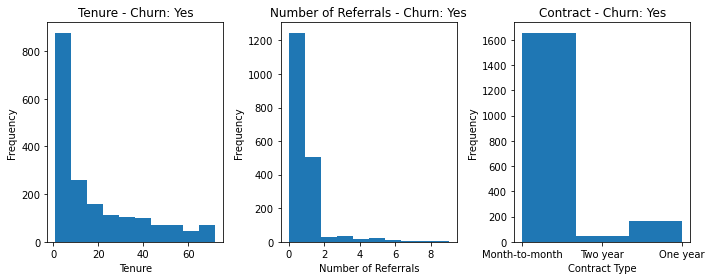

In [115]:
tenure_yes = df_yes['Tenure']
referrals_yes = df_yes['Number of Referrals']
contract_type_yes = df_yes['Contract']

tenure_no = df_no['Tenure']
referrals_no = df_no['Number of Referrals']
contract_type_no = df_no['Contract']

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(tenure_yes, bins=10)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure - Churn: Yes')

plt.subplot(1, 3, 2)
plt.hist(referrals_yes, bins=10)
plt.xlabel('Number of Referrals')
plt.ylabel('Frequency')
plt.title('Number of Referrals - Churn: Yes')

plt.subplot(1, 3, 3)
plt.hist(contract_type_yes, bins=3)
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.title('Contract - Churn: Yes')

plt.tight_layout()
plt.show()

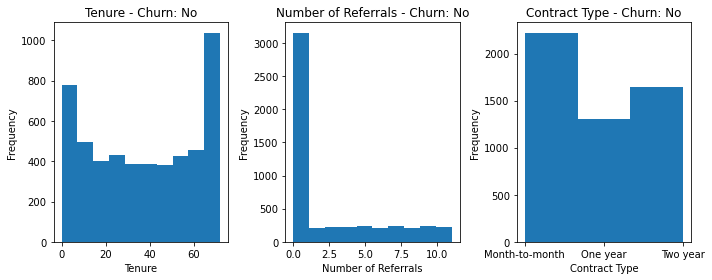

In [116]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.hist(tenure_no, bins=10)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure - Churn: No')

plt.subplot(1, 3, 2)
plt.hist(referrals_no, bins=10)
plt.xlabel('Number of Referrals')
plt.ylabel('Frequency')
plt.title('Number of Referrals - Churn: No')

plt.subplot(1, 3, 3)
plt.hist(contract_type_no, bins=3)
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.title('Contract Type - Churn: No')

plt.tight_layout()
plt.show()

As can be easily viewed from these bar charts, these features have a varying impact on whether or not a customer will churn, and should provide plenty of usable data for the purpose! From this, we begin to learn which features have the most impact on churn - in this case, total revenue, total charges and total long distance charges seem to be very important factors to whether or not a customer will churn, and that does make a lot of logical sense. If a customer has paid in a lot of money to a company ("Total Revenue"), they would be less likely to churn, as they've invested money. The "sunk cost fallacy" can explain this. To take things a logical step further, customers might also be more likely to churn (or not) if they are consistently charged extra for long distance or other features.

Now that we have established that our features do have some correlation as to whether or not a customer will churn, we can begin the modeling process with what might be our most important step - splitting our data into a test and training set, respectively. We do this because data leakage can cause a model to overperform. In other words, showing the test data to a model whilst it is training means that it is not truly telling us how well it performs on new data.

In [34]:
X = final_df.drop('Churn', axis=1)
y = final_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [35]:
X_train

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Internet Type,Avg Monthly GB Download,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
6607,No,No,Yes,1,No,No phone service,DSL,No,No,No,...,Cable,51,No,No,25.30,25.30,0.0,10,0.00,35.30
2598,No,No,No,7,Yes,No,Fiber optic,No,No,Yes,...,Fiber Optic,10,No,No,75.15,525.00,0.0,10,210.42,745.42
2345,No,No,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,...,None,0,No,No,20.05,85.50,0.0,0,109.48,194.98
4093,No,No,No,29,Yes,Yes,Fiber optic,No,No,No,...,Fiber Optic,42,No,Yes,76.00,2215.25,0.0,0,203.29,2418.54
693,No,No,No,3,Yes,Yes,Fiber optic,No,No,No,...,Fiber Optic,10,No,Yes,75.10,270.70,0.0,0,79.56,350.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,No,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,...,Cable,5,Yes,Yes,95.00,95.00,0.0,0,12.04,107.04
5191,No,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,...,Cable,51,Yes,Yes,91.10,2198.30,0.0,0,643.31,2841.61
5226,No,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,...,None,0,No,No,21.15,306.05,0.0,0,406.80,712.85
5390,Yes,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,...,Fiber Optic,26,No,Yes,99.45,1200.15,0.0,0,262.68,1462.83


In [36]:
X_test

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Internet Type,Avg Monthly GB Download,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
185,No,Yes,No,1,No,No phone service,DSL,No,No,No,...,DSL,29,Yes,Yes,24.80,24.80,0.0,0,0.00,24.80
2715,No,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,...,None,0,No,No,25.25,996.45,0.0,0,1689.61,2686.06
3825,No,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,...,None,0,No,No,19.35,1031.70,0.0,0,513.24,1544.94
1807,No,No,No,1,Yes,No,Fiber optic,No,No,Yes,...,Cable,9,No,Yes,76.35,76.35,0.0,0,7.26,83.61
132,No,No,No,67,Yes,No,DSL,No,No,No,...,DSL,8,No,Yes,50.55,3260.10,0.0,0,2182.86,5442.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,No,No,No,3,Yes,Yes,Fiber optic,No,No,No,...,Fiber Optic,23,No,No,75.80,246.30,0.0,10,15.60,271.90
2301,No,Yes,No,8,Yes,Yes,Fiber optic,No,No,No,...,Fiber Optic,4,Yes,No,90.25,743.75,0.0,0,79.04,822.79
5121,No,No,No,29,Yes,Yes,DSL,No,Yes,Yes,...,DSL,47,Yes,Yes,70.90,1964.60,0.0,0,836.07,2800.67
677,No,No,No,2,No,No phone service,DSL,No,No,No,...,DSL,76,Yes,Yes,34.70,62.25,0.0,0,0.00,62.25


Now, we will begin the modeling process by setting up a pipeline in order to scale our numerical features (such as Avg Monthly GB Download) to ensure that they are each taken with the same importance, and encoding our categorical features (such as Internet Service) to allow the model to parse through them properly. Many of our columns are actually Boolean, or "yes/no" data types, but they are listed as objects. Still, they will be able to be used in modeling just fine without any encoding, and we will not require any ordinal encoding as nothing here is in any sort of order. Essentially, the internet type ("Fiber optic", "DSL", or "no") has no listed order; there is no measurable numeric difference between "no" and "Fiber optic", so it does not need to be ordinally encoded.

In [37]:
le = LabelEncoder()

In [38]:
le.fit(y_train)

LabelEncoder()

In [39]:
encoded_y_train = le.fit_transform(y_train)

In [40]:
encoded_y = le.transform(y_test)

In [41]:
le.classes_

array(['No', 'Yes'], dtype=object)

In the above cells, I have had to establish a Label Encoder so that our target column, "Churn", will be registered as 0/1 rather than "no"/"yes", respectively. This will allow us to include the target column in the modeling process, which as I'm sure you can imagine is a very important thing to include!

In [42]:
num_feats = ['Tenure', 'Number of Referrals', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
cat_feats = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method', 'Offer', 'Internet Type']
ord_feats = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Gender', 'Referred a Friend', 'Streaming Music', 'Unlimited Data']

We've encoded "Gender" as male (0) and female (1).

In [43]:
X_train.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Gender', 'Referred a Friend', 'Number of Referrals', 'Offer',
       'Avg Monthly Long Distance Charges', 'Internet Type',
       'Avg Monthly GB Download', 'Streaming Music', 'Unlimited Data',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [44]:
prep_pipeline = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), cat_feats),
        ('numeric', StandardScaler(), num_feats),
        ('other', OrdinalEncoder(categories=[['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['Male', 'Female'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes']]), ord_feats),
    ],
    remainder='passthrough')

In [45]:
X_train_encoded = prep_pipeline.fit_transform(X_train)

In [46]:
X_test_encoded = prep_pipeline.transform(X_test)

What we've done in the above cells is to create a pipeline that will OneHotEncode our categorical features and scale our numeric features, respectively, whilst leaving those that need no attention from the prep pipeline unchanged. At this point, we will instantiate a dummy model and run predictions on our training data. We have also LabelEncoded our target column to transform it from yes/no to 1/0, respectively, in order to make modeling possible.

In [47]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [48]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [49]:
dummy_model.predict(X_train)[:50]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'], dtype='<U2')

As stated, the dummy model has taken the most prevalent input from the 'Churn' target column and made that response its answer each time. In other words, the model has predicted that customers will not churn, because that is the most prevalent value in our target column. Now would be a good time to point out that we do have what is called a class imbalance, meaning that there are far more 'unchurned' customers than 'churned' ones to pull data from. We will be dealing with that throughout the process of modeling and analyzing, but for a dummy model, it is unnecessary to put that work in yet.

In [50]:
y.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

With all that in mind, let's see how well our dummy model performed!

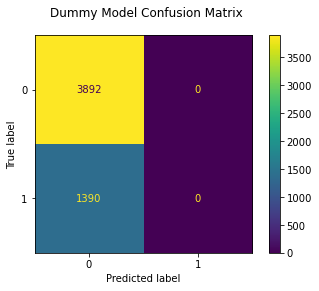

In [51]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(y_train, dummy_model.predict(X_train))).plot(ax=ax)

In [52]:
cross_val_score(dummy_model, X_train, y_train, cv=5).mean()

0.7368420486797971

At this point, our dummy model has a 73% accuracy score, and it will have 0% recall because it is a dummy model with no variation in its response - it predicts that a customer will not churn and it is correct 73% of the time. Obviously, 73% is not a very good score, and 0% is even worse, because remember that our biggest concern insofar as measurement metrics will be recall for this model. Therefore, the current score to beat is actually 0%, though we would love to see a better accuracy score as well.

First, we will instantiate a simple Decision Tree classifier to see if that alone performs better than our dummy model.

In [53]:
clf = tree.DecisionTreeClassifier()

In [54]:
clf.fit(X_train_encoded, encoded_y_train)

DecisionTreeClassifier()

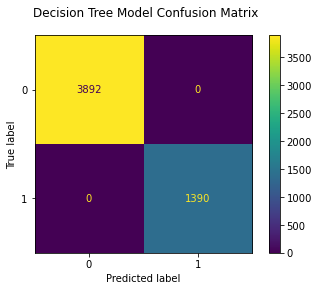

In [55]:
fig, ax = plt.subplots()

fig.suptitle("Decision Tree Model Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(encoded_y_train, clf.predict(X_train_encoded))).plot(ax=ax)

In [56]:
cross_val_score(clf, X_train_encoded, encoded_y_train, cv=5).mean()

0.7485830394770793

In [57]:
clf.score(X_train_encoded, encoded_y_train)

1.0

As we can see, our simple decision tree is very overfit. Rather than try to fiddle with the very simple decision tree that will be unlikely to get us anywhere really, I have decided to move into random forest modeling and tweak that instead so that I can find the best model for this job.

In [58]:
rfc = RandomForestClassifier(random_state=42)

In [59]:
rfc.fit(X_train_encoded, encoded_y_train)

RandomForestClassifier(random_state=42)

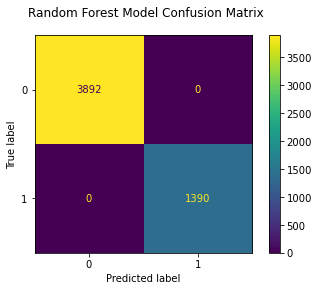

In [60]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Model Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(encoded_y_train, rfc.predict(X_train_encoded))).plot(ax=ax)

In [61]:
cross_val_score(rfc, X_train_encoded, encoded_y_train, cv=5).mean()

0.8152172744474069

In [62]:
rfc.score(X_train_encoded, encoded_y_train)

1.0

As we may have guessed, an unaltered random forest model presents us with the exact same information as an even simpler decision tree model. Now, it's time to start hypertuning our random forest so that we can reduce overfitting and begin to accurately predict whether or not a customer will churn. We will need to tune our model, but also deal with the previously mentioned class imbalance in our data - most of the customers did not churn, and so our models are assuming that most people will not churn.

Another thing to note is that we have done these models outside of a pipeline, mainly because they are very simple models that I expected to both overfit and not predict very well. Thusly, it was not strictly "necessary" to establish a modeling pipeline for these very simple models. We will do that now, and use GridSearchCV to further tune our model.

In [63]:
model_pipeline = Pipeline(steps=[('preprocessing', prep_pipeline),
                                ('classifier', rfc)])

In [64]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample']
}

In [65]:
param_grid2 = {
    'classifier__n_estimators': [90, 100, 110],
    'classifier__max_depth': [4, 5, 6],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample']
}

In the above cells, I have set up some parameter grids to allow us to hypertune our models and choose the best possible parameters to model with in order to achieve high recall and accuracy, though recall is our most important metric.

In [66]:
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='recall')

In [67]:
grid_search.fit(X_train, encoded_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Multiple '
                                                                          'Lines',
                                                                          'Internet '
                                                                          'Service',
                                                                          'Online '
                                                                          'Security',
                                                                          'Online '
                                              

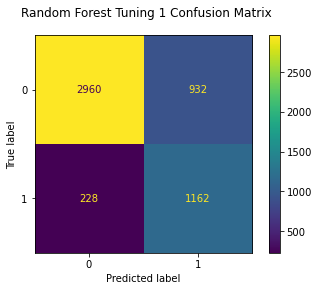

In [68]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Tuning 1 Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(encoded_y_train, grid_search.predict(X_train))).plot(ax=ax)

In [69]:
grid_search.best_score_

0.8129496402877698

In [70]:
grid_search.score(X_train, encoded_y_train)

0.8359712230215828

In [71]:
best_params1 = grid_search.best_params_
best_model1 = grid_search.best_estimator_

In [72]:
best_params1

{'classifier__class_weight': 'balanced_subsample',
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

After our first attempt at tuning our model, we have wound up with a slightly lower accuracy score, but our model is not as overfit. Furthermore, we have achieved a fairly decent recall score. Do recall (ba-dum-tss) that the reason "recall" is our most important metric is that recall shows whether a model can find all objects of the target class - in this case "churn". In other words, can this model find every possible churn case and help us prevent it? Earmarking potential churning customers is far more important than simply accurately predicting that they'll exist.

Now, we must use the hyperparameters given to us by our first attempt at tuning and see if we can't raise our recall, accuracy, or both!

In [73]:
grid_search2 = GridSearchCV(estimator=model_pipeline, param_grid=param_grid2, cv=5, scoring='recall')

In [74]:
grid_search2.fit(X_train, encoded_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Multiple '
                                                                          'Lines',
                                                                          'Internet '
                                                                          'Service',
                                                                          'Online '
                                                                          'Security',
                                                                          'Online '
                                              

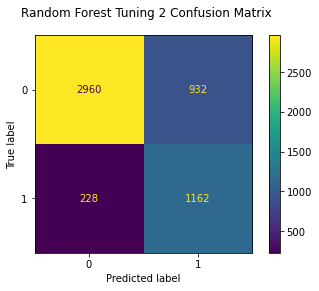

In [104]:
fig, ax = plt.subplots()

fig.suptitle("Random Forest Tuning 2 Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(encoded_y_train, grid_search2.predict(X_train))).plot(ax=ax)

In [105]:
best_params2 = grid_search2.best_params_
best_model2 = grid_search2.best_estimator_

In [106]:
best_params2

{'classifier__class_weight': 'balanced_subsample',
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

In [78]:
grid_search2.best_score_

0.8129496402877698

In [79]:
grid_search2.score(X_train, encoded_y_train)

0.8359712230215828

In [100]:
ypred_final = grid_search.predict(X_train)

In [101]:
ypred_final_test = grid_search.predict(X_test)

In [102]:
accuracy_score(encoded_y, ypred_final_test)

0.7745599091425327

In [103]:
recall_score(encoded_y, ypred_final_test)

0.837160751565762

Our last model, here referred to as grid_search2, had a recall score of 84 and an accuracy score of 77. Due to this, our first tuning attempt turned out to be the more successful model, which is referred to as grid_search1. Here is a confusion matrix of gridsearch1 on the testing data.

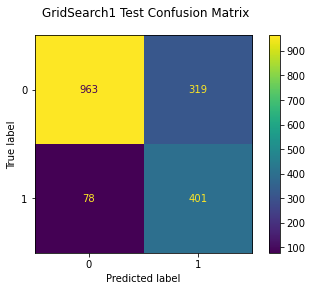

In [84]:
fig, ax = plt.subplots()

fig.suptitle("GridSearch1 Test Confusion Matrix")

ConfusionMatrixDisplay(confusion_matrix(encoded_y, grid_search.predict(X_test))).plot(ax=ax)

Our last analytic step is to determine feature importance within the model so that we can move forward with advisable next steps for our client. In other words, which of these features impacts customer churn the most? Or the least? Anyway, so I did a bit of a stupid and I did not set up the Capstone environment that we were advised to set up, meaning I am working with an outdated version of sklearn that makes it more difficult to get the feature importances from models. This is my own fault, and also allows me to showcase that I do know how to do it, even the hard way.

In [85]:
feature_names = final_df.columns

In [86]:
feature_names

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn', 'Gender', 'Referred a Friend', 'Number of Referrals', 'Offer',
       'Avg Monthly Long Distance Charges', 'Internet Type',
       'Avg Monthly GB Download', 'Streaming Music', 'Unlimited Data',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [87]:
importance = best_model1.named_steps['classifier'].feature_importances_

In [88]:
len(importance)

60

In [89]:
best_model1.named_steps['preprocessing']

ColumnTransformer(remainder='passthrough',
                  transformers=[('categorical',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Multiple Lines', 'Internet Service',
                                  'Online Security', 'Online Backup',
                                  'Device Protection', 'Tech Support',
                                  'Streaming TV', 'Streaming Movies',
                                  'Contract', 'Payment Method', 'Offer',
                                  'Internet Type']),
                                ('numeric', StandardScaler(),
                                 ['Tenure', 'Number of Referrals...
                                  'Total Extra Data Charges',
                                  'Total Long Distance Charges',
                                  'Total Revenue']),
                                ('other',
                                 OrdinalEncoder(categories=[['No', 'Yes'],


In [90]:
ohe_ob = best_model1.named_steps['preprocessing'].named_transformers_['categorical']

In [91]:
feature_names = list(ohe_ob.fit(final_df[cat_feats]).get_feature_names())

In [92]:
feature_names.extend(num_feats)

In [93]:
feature_names.extend(ord_feats)

In [94]:
len(feature_names)

60

In [95]:
feature_importance_dict = dict(zip(feature_names, importance))

In [96]:
feature_importance_dict

{'x0_No': 0.0007536644088750889,
 'x0_No phone service': 0.00045462930063695333,
 'x0_Yes': 0.0012088887538025575,
 'x1_DSL': 0.010471131528028282,
 'x1_Fiber optic': 0.05605535990829115,
 'x1_No': 0.005828075900586288,
 'x2_No': 0.04308050128351848,
 'x2_No internet service': 0.010758660321975547,
 'x2_Yes': 0.009538193603015714,
 'x3_No': 0.010948717847090852,
 'x3_No internet service': 0.0071142202338824985,
 'x3_Yes': 0.0035219761947465813,
 'x4_No': 0.00550623506937089,
 'x4_No internet service': 0.012410124223649278,
 'x4_Yes': 0.0007705838082981888,
 'x5_No': 0.042529118139103324,
 'x5_No internet service': 0.01793669484824282,
 'x5_Yes': 0.009127110094486211,
 'x6_No': 0.0012623396709702493,
 'x6_No internet service': 0.010379730771566112,
 'x6_Yes': 0.001295866263891002,
 'x7_No': 0.0007621508683868874,
 'x7_No internet service': 0.006295363219339737,
 'x7_Yes': 0.00191331154499985,
 'x8_Month-to-month': 0.12434859554708974,
 'x8_One year': 0.012809908978589822,
 'x8_Two year'

In [97]:
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

Make the below cell into a dataframe and pull into Tableau to make vizzes for feature importance.

In [117]:
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

Number of Referrals: 0.1250930330286263
x8_Month-to-month: 0.12434859554708974
Tenure: 0.08985653476063526
x8_Two year: 0.08255887793348525
x1_Fiber optic: 0.05605535990829115
Total Revenue: 0.04719070843920512
Total Charges: 0.044814602030627246
x2_No: 0.04308050128351848
x5_No: 0.042529118139103324
x9_Electronic check: 0.036782836586867616
Total Long Distance Charges: 0.03656218108324762
x11_Fiber Optic: 0.027721641271281537
Monthly Charge: 0.024110778635034157
Avg Monthly GB Download: 0.018277892992969676
x5_No internet service: 0.01793669484824282
x11_None: 0.013332072915097172
x8_One year: 0.012809908978589822
x4_No internet service: 0.012410124223649278
x3_No: 0.010948717847090852
x2_No internet service: 0.010758660321975547
x1_DSL: 0.010471131528028282
x6_No internet service: 0.010379730771566112
x2_Yes: 0.009538193603015714
x5_Yes: 0.009127110094486211
x3_No internet service: 0.0071142202338824985
Avg Monthly Long Distance Charges: 0.006771165259834211
x10_Offer E: 0.0063446639

To summarize the above cells, we have pulled the column names from the original dataframe and then dug into our column transformer in order to match those new columns created by encoding with the original column names. Then, I stitched that information together in order to allow for teasing out the important features so that I could save them off into a dataframe and then a CSV in order to make visuals for that.

In [118]:
features_df = pd.DataFrame(sorted_importance)

In [119]:
features_df.to_csv('Data/features.csv', index=False)

# Model Recommendations

After what hypertuning that life, time, and computer constraints would allow, we have arrived at the conclusion that our second attempt had our highest recall, and therefore is the best model that we could be using for this purpose. Our second model was a Random Forest, hypertuned with the parameters class_weight, max_depth and n_estimators. This model displayed 84% recall and 77% accuracy.

# Conclusion

In conclusion, it is entirely possible and very beneficial to employ a similar predictive model for the purpose of customer churn issues on a real-world scale. With what limited time and resources I had available, I was able to properly tune a model that was 77% accurate and had 84% recall, and I'm sure that those numbers could be tweaked and increased with further time and resources applied. Earlier in this notebook, I mentioned that Verizon had clocked something to the tune of $134 billion in revenue in 2023; I do not know what Verizon is doing to solve any churn problems they may be having, but imagine if a company like Verizon could successfully stop customers leaving whenever possible - it could increase their revenue even further, and therefore, this model (and its kin) is priceless.

# Next Steps

After further tweaking and perfecting of the hypertuning process, a telecommunications company could use this model in order to accurately predict whether a customer will churn soon and then take steps to reach out and prevent that customer from doing so. For example, the number of referrals and contract type seemed to be very important factors as to whether or not a customer would churn, and so perhaps a telecommunications company could apply a special bonus to increase the number of referrals each customer has or a specific deal for a certain contract type.

# Citations

1 - "Mastering Random Forests: A Comprehensive Guide"
    Sandeep Ram
    Published in "Towards Data Science"
    October 18, 2020
    https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1#:~:text=max_depth%3A%20The%20number%20of%20splits,3%2C%205%2C%20or%207.
    
2 - "How to Cite Data and Code"
    Author Unlisted
    Iowa University Libraries
    Date Unlisted
    https://www.lib.uiowa.edu/data/cite-data-and-code/